# Task 20 (Incomplete)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Income_census_data.csv')
df.head()

,age,education.num,sex,hours.per.week,income
0,90,9,Female,40,30k or less
1,82,9,Female,18,30k or less
2,66,10,Female,40,30k or less
3,54,4,Female,40,30k or less
4,41,10,Female,40,30k or less


In [5]:
df['income'] = df['income'].map({'30k or less': 0, 'Over 30k': 1})
df['sex'] = df['sex'].map({'Female': 0, 'Male': 1})

In [6]:
X = df[['age', 'education.num', 'sex', 'hours.per.week']]
y = df['income']

In [7]:
# Split the original dataset into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set further into training and development sets
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [8]:
# Train the regular Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Task 21

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
# Creating the bagged, random forest and boosted trees
bagging_clf = BaggingClassifier(random_state=42)
random_forest_clf = RandomForestClassifier(random_state=42)
boosting_clf = GradientBoostingClassifier(random_state=42)

bagging_clf.fit(X_train, y_train)
random_forest_clf.fit(X_train, y_train)
boosting_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [22]:
# Getting feature names
features = X_train.columns.tolist()
features

['age', 'education.num', 'sex', 'hours.per.week']

In [11]:
# Feature importances
importances = random_forest_clf.feature_importances_
importances

array([0.42972272, 0.25178364, 0.07321148, 0.24528215])

Match importance scores to order of features to determine which feature was the most important (highest score = most important).

Text(0, 0.5, 'Features')

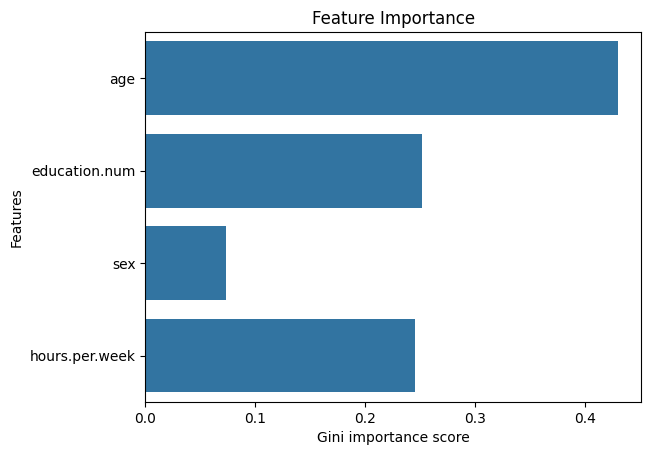

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualise importances
importances_df = pd.DataFrame({'Feature': features, 'Gini Importance': importances})

sns.barplot(x=importances_df['Gini Importance'], y=importances_df['Feature'], data=importances_df)
plt.title("Feature Importance")
plt.xlabel("Gini importance score")
plt.ylabel("Features")

Explain that age is the most important feature since it has the highest score (longest bar in barplot).

In [13]:
from sklearn.model_selection import GridSearchCV

# Choose the model
boosting_clf = GradientBoostingClassifier(random_state=42)

# Set up a parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5]
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(
    estimator = boosting_clf,
    param_grid = param_grid,
    scoring = 'accuracy'
)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [15]:
# Get the report
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.387888,0.008721,0.007925,0.001446,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.798079,0.802881,0.803148,0.811150,0.804214,0.803894,0.004199,4
1,1.037440,0.133529,0.013454,0.000735,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.797813,0.805281,0.802881,0.810616,0.806615,0.804641,0.004236,2
2,1.476682,0.018732,0.014022,0.000568,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.797546,0.803414,0.801280,0.808216,0.806348,0.803361,0.003759,7
3,0.471468,0.002108,0.007750,0.000162,4,50,"{'max_depth': 4, 'n_estimators': 50}",0.798880,0.804214,0.803948,0.810883,0.805015,0.804588,0.003819,3
4,1.230675,0.145677,0.012903,0.001761,4,100,"{'max_depth': 4, 'n_estimators': 100}",0.800213,0.805281,0.806082,0.810083,0.806348,0.805601,0.003162,1
5,2.267490,0.520274,0.017339,0.002626,4,200,"{'max_depth': 4, 'n_estimators': 200}",0.801814,0.801280,0.802081,0.807149,0.805015,0.803468,0.002253,6
6,0.884720,0.136045,0.015420,0.007029,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.797546,0.803948,0.803148,0.809549,0.804481,0.803734,0.003822,5
7,1.140532,0.003670,0.012549,0.000210,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.798079,0.802614,0.802347,0.807682,0.801814,0.802507,0.003063,8
8,2.694096,0.378477,0.030894,0.015979,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.797546,0.799947,0.799947,0.807149,0.799413,0.800800,0.003295,9


In [16]:
# Extract only the columns we are interested in
results[['param_n_estimators', 'param_max_depth', 'mean_test_score']]

,param_n_estimators,param_max_depth,mean_test_score
0,50,3,0.803894
1,100,3,0.804641
2,200,3,0.803361
3,50,4,0.804588
4,100,4,0.805601
5,200,4,0.803468
6,50,5,0.803734
7,100,5,0.802507
8,200,5,0.800800


In [17]:
# Report on the best model
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best accuracy score: {best_score}")

Best parameters found: {'max_depth': 4, 'n_estimators': 100}
Best accuracy score: 0.8056014937316618
